## Check days with catch in the predefined areas in the time range 2019 - 2024

Goal: find an area with more catch days than may-aug (Lofoten)

In [1]:
import pandas as pd


from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parents[1]))

from utilities import get_region_border, set_catch_ratio
from plot_data import plot_all_catches, plot_daily_catches
from fetch_data import fetch_data_from_fiskeridirektoratet

/home/anna/msc_oppgave/fish-forecast/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
REGIONS_PATH = '/home/anna/msc_oppgave/fish-forecast/areas.json'
MAC_REGIONS = ["FA_Makrell_MayAug_sept",
               "FA_Makrell_MayAug_summer",
               "FA_Makrell_JulNov_winter",
               "FA_Arctic_Ocean_Sub_Area"]

MAC_TIMES = {
    "FA_Makrell_MayAug_sept": ['05-01', '09-30'],
    "FA_Makrell_MayAug_summer": ['05-01', '08-31'],
    "FA_Makrell_JulNov_winter": ['07-01', '11-30'],
    "FA_Arctic_Ocean_Sub_Area": ['01-01', '12-31']
}

regions = dict()

for region in MAC_REGIONS:
	regions[region] = get_region_border(REGIONS_PATH, region, square=False)
print(f"Regions loaded: {list(regions.keys())}")
print(f"{MAC_REGIONS[0]}: {regions[MAC_REGIONS[0]]}")

Regions loaded: ['FA_Makrell_MayAug_sept', 'FA_Makrell_MayAug_summer', 'FA_Makrell_JulNov_winter', 'FA_Arctic_Ocean_Sub_Area']
FA_Makrell_MayAug_sept: {'SW': {'lat': 57.941841, 'lon': -2.425635}, 'SE': {'lat': 57.941841, 'lon': 12.925794}, 'NE': {'lat': 66.0, 'lon': 12.925794}, 'NW': {'lat': 66.0, 'lon': -2.425635}}


In [3]:
dfs = dict()
SAVE_PATH = '/home/anna/msc_oppgave/fish-forecast/Data-Exploration/existing_areas'
POSTFIX = '_19-24_5050'

for region_name, region_coords in regions.items():
    # Check if file already exists
	file_path = Path(f"{SAVE_PATH}/{region_name}{POSTFIX}.csv")
	if file_path.exists():
		print(f"File for {region_name} already exists, loading from file.")
		region_df = pd.read_csv(file_path, sep=';')
		# convert the column Date to timestamp
		region_df['Date'] = pd.to_datetime(region_df['Date'])
		dfs[region_name] = region_df

	else:
		dfs[region_name] = pd.DataFrame()
		print(f"Fetching data for region: {region_name}")
		for y in range(2019, 2024 + 1):
			test_params_fdir = {
				"dataset_path": "/home/anna/msc_oppgave/data/fiskeridirektoratet/",
				"time": [f"{y}-{MAC_TIMES[region_name][0]}", f"{y}-{MAC_TIMES[region_name][1]}"],
				"species": "MAC"
			}

			test_params_fdir.update(region_coords)

			ds = fetch_data_from_fiskeridirektoratet(test_params_fdir, day_samples=False)

			ds = set_catch_ratio(test_params_fdir, ds, 1.0, method='continuous')

			dfs[region_name] = pd.concat([dfs[region_name], ds])
		region_df = dfs[region_name]
		region_df.to_csv(f"{SAVE_PATH}/{region_name}{POSTFIX}.csv", index=False, sep=';')
print(f"Data fetched for regions: {list(dfs.keys())}")
print(f"{MAC_REGIONS[0]}: {dfs[MAC_REGIONS[0]].columns}")

File for FA_Makrell_MayAug_sept already exists, loading from file.
File for FA_Makrell_MayAug_summer already exists, loading from file.
File for FA_Makrell_JulNov_winter already exists, loading from file.
File for FA_Arctic_Ocean_Sub_Area already exists, loading from file.
Data fetched for regions: ['FA_Makrell_MayAug_sept', 'FA_Makrell_MayAug_summer', 'FA_Makrell_JulNov_winter', 'FA_Arctic_Ocean_Sub_Area']
FA_Makrell_MayAug_sept: Index(['Rundvekt', 'CatchLat', 'CatchLon', 'Location', 'Date'], dtype='object')


In [4]:
unique_dates = dict()

for region, region_df in dfs.items():
	unique_dates[region] = region_df['Date'].unique()
	print(f"Unique Dates in {region}: {len(unique_dates[region])}")

Unique Dates in FA_Makrell_MayAug_sept: 582
Unique Dates in FA_Makrell_MayAug_summer: 292
Unique Dates in FA_Makrell_JulNov_winter: 812
Unique Dates in FA_Arctic_Ocean_Sub_Area: 1416


20:40:57.110 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 8 element 0 due to error in location: 'NaTType' object has no attribute 'split'
20:40:57.111 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 8 element 1 due to error in location: 'NaTType' object has no attribute 'split'
20:40:57.111 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 9 element 0 due to error in location: 'NaTType' object has no attribute 'split'
20:40:57.112 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 9 element 1 due to error in location: 'NaTType' object has no attribute 'split'
20:40:57.112 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 10 element 0 due to error in location: 'NaTType' object has no attribute 'split'
20:40:57.113 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 10 element 1 due to error in 

FA_Makrell_MayAug_sept - Total Catches: 9325 
Total Days: 582
FA_Makrell_MayAug_sept Aspect Ratio: (8.058159000000003, 15.351429) (1.9050789392465441)


20:40:57.252 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 893 element 0 due to error in location: 'NaTType' object has no attribute 'split'
20:40:57.252 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 893 element 1 due to error in location: 'NaTType' object has no attribute 'split'
20:40:57.315 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 2207 element 0 due to error in location: 'NaTType' object has no attribute 'split'
20:40:57.315 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 2207 element 1 due to error in location: 'NaTType' object has no attribute 'split'
20:40:57.316 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 2208 element 0 due to error in location: 'NaTType' object has no attribute 'split'
20:40:57.316 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 2208 element 1 du

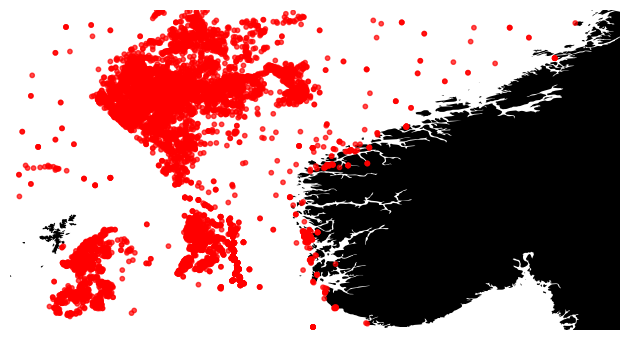

20:41:00.836 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 27 element 0 due to error in location: 'NaTType' object has no attribute 'split'
20:41:00.837 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 27 element 1 due to error in location: 'NaTType' object has no attribute 'split'
20:41:00.837 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 28 element 0 due to error in location: 'NaTType' object has no attribute 'split'
20:41:00.838 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 28 element 1 due to error in location: 'NaTType' object has no attribute 'split'
20:41:00.838 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 29 element 0 due to error in location: 'NaTType' object has no attribute 'split'
20:41:00.839 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 29 element 1 due to error

FA_Makrell_MayAug_summer - Total Catches: 1044 
Total Days: 292
FA_Makrell_MayAug_summer Aspect Ratio: (2.7900000000000063, 10.569999999999999) (3.788530465949812)


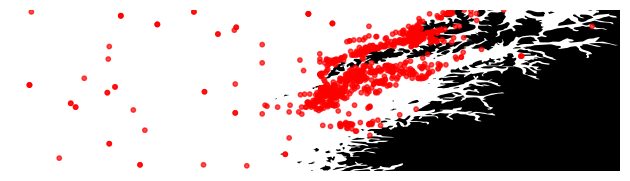

20:41:01.097 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 18 element 0 due to error in location: 'NaTType' object has no attribute 'split'
20:41:01.098 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 18 element 1 due to error in location: 'NaTType' object has no attribute 'split'
20:41:01.098 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 21 element 0 due to error in location: 'NaTType' object has no attribute 'split'
20:41:01.099 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 21 element 1 due to error in location: 'NaTType' object has no attribute 'split'
20:41:01.099 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 22 element 0 due to error in location: 'NaTType' object has no attribute 'split'
20:41:01.100 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 22 element 1 due to error

FA_Makrell_JulNov_winter - Total Catches: 8712 
Total Days: 812
FA_Makrell_JulNov_winter Aspect Ratio: (5.146092000000003, 10.486449) (2.0377500052466986)


20:41:01.290 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 2064 element 0 due to error in location: 'NaTType' object has no attribute 'split'
20:41:01.290 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 2064 element 1 due to error in location: 'NaTType' object has no attribute 'split'
20:41:01.291 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 2069 element 0 due to error in location: 'NaTType' object has no attribute 'split'
20:41:01.292 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 2069 element 1 due to error in location: 'NaTType' object has no attribute 'split'
20:41:01.292 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 2070 element 0 due to error in location: 'NaTType' object has no attribute 'split'
20:41:01.293 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 2070 element 1 

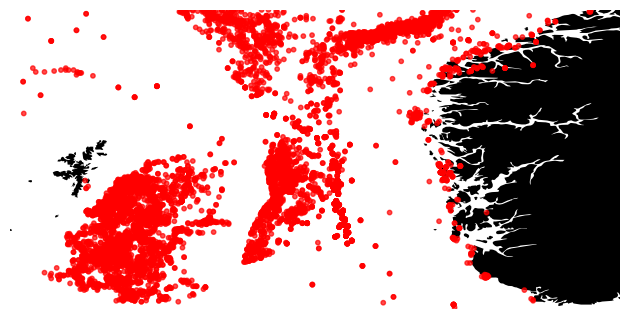

20:41:02.134 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 45 element 0 due to error in location: 'NaTType' object has no attribute 'split'
20:41:02.134 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 45 element 1 due to error in location: 'NaTType' object has no attribute 'split'
20:41:02.135 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 46 element 0 due to error in location: 'NaTType' object has no attribute 'split'
20:41:02.135 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 46 element 1 due to error in location: 'NaTType' object has no attribute 'split'
20:41:02.136 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 47 element 0 due to error in location: 'NaTType' object has no attribute 'split'
20:41:02.136 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 47 element 1 due to error

FA_Arctic_Ocean_Sub_Area - Total Catches: 16101 
Total Days: 1416
FA_Arctic_Ocean_Sub_Area Aspect Ratio: (14.817742999999993, 22.425635) (1.513431229034004)


20:41:02.336 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 2371 element 1 due to error in location: 'NaTType' object has no attribute 'split'
20:41:02.337 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 2372 element 0 due to error in location: 'NaTType' object has no attribute 'split'
20:41:02.337 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 2372 element 1 due to error in location: 'NaTType' object has no attribute 'split'
20:41:02.338 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 2373 element 0 due to error in location: 'NaTType' object has no attribute 'split'
20:41:02.338 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 2373 element 1 due to error in location: 'NaTType' object has no attribute 'split'
20:41:02.339 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:177 - Skipping row 2379 element 0 

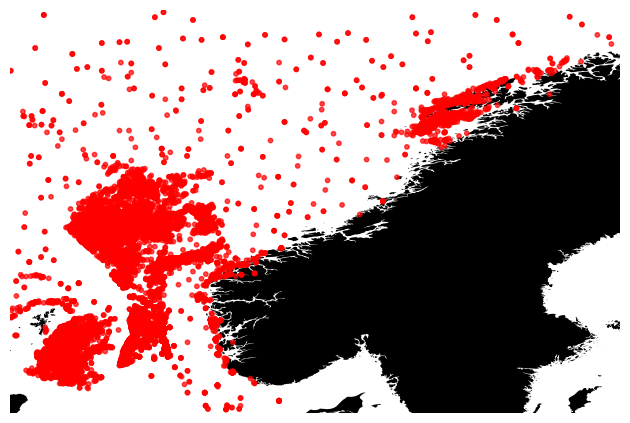

In [5]:
for region, region_df in dfs.items():
	print(f'{region} - Total Catches: {region_df.shape[0]} \nTotal Days: {len(unique_dates[region])}')

	# calculate aspect ratio of the region i.e. max lat - min lat / max lon - min lon
	regions[region]['aspect_ratio'] = ((regions[region]['NE']['lat'] - regions[region]['SW']['lat']), (regions[region]['NE']['lon'] - regions[region]['SW']['lon']))
	print(f"{region} Aspect Ratio: {regions[region]['aspect_ratio']} ({regions[region]['aspect_ratio'][1]/regions[region]['aspect_ratio'][0]})")

	aspect_ratio = region_df.shape[0] / len(unique_dates[region])
	plot_all_catches(region_df, regions[region], save_path=None, use_catch_weight=False)


20:41:04.002 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:284 - Plotting catches for date: 2019-06-08 00:00:00


FA_Makrell_MayAug_sept


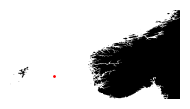

20:41:04.045 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:284 - Plotting catches for date: 2019-06-26 00:00:00


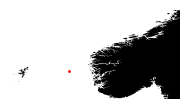

20:41:04.087 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:284 - Plotting catches for date: 2019-08-22 00:00:00


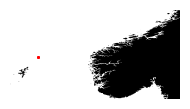

20:41:04.128 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:284 - Plotting catches for date: 2019-06-19 00:00:00


FA_Makrell_MayAug_summer


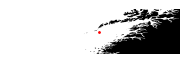

20:41:04.169 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:284 - Plotting catches for date: 2019-06-20 00:00:00


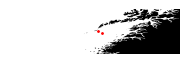

20:41:04.211 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:284 - Plotting catches for date: 2019-06-21 00:00:00


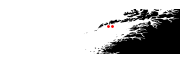

20:41:04.253 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:284 - Plotting catches for date: 2019-08-22 00:00:00


FA_Makrell_JulNov_winter


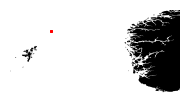

20:41:04.296 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:284 - Plotting catches for date: 2019-01-04 00:00:00


FA_Arctic_Ocean_Sub_Area


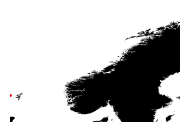

20:41:04.343 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:284 - Plotting catches for date: 2019-01-05 00:00:00


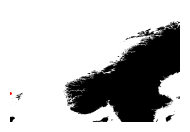

20:41:04.387 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:284 - Plotting catches for date: 2019-01-06 00:00:00


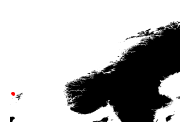

In [6]:
for region, region_df in dfs.items():
    print(region)
    plot_daily_catches(region_df[:5], regions[region], save_dir=None, use_catch_weight=False)

Plotting date distribution for FA_Makrell_MayAug_sept, catches: 9325 dates: 291/291: 582


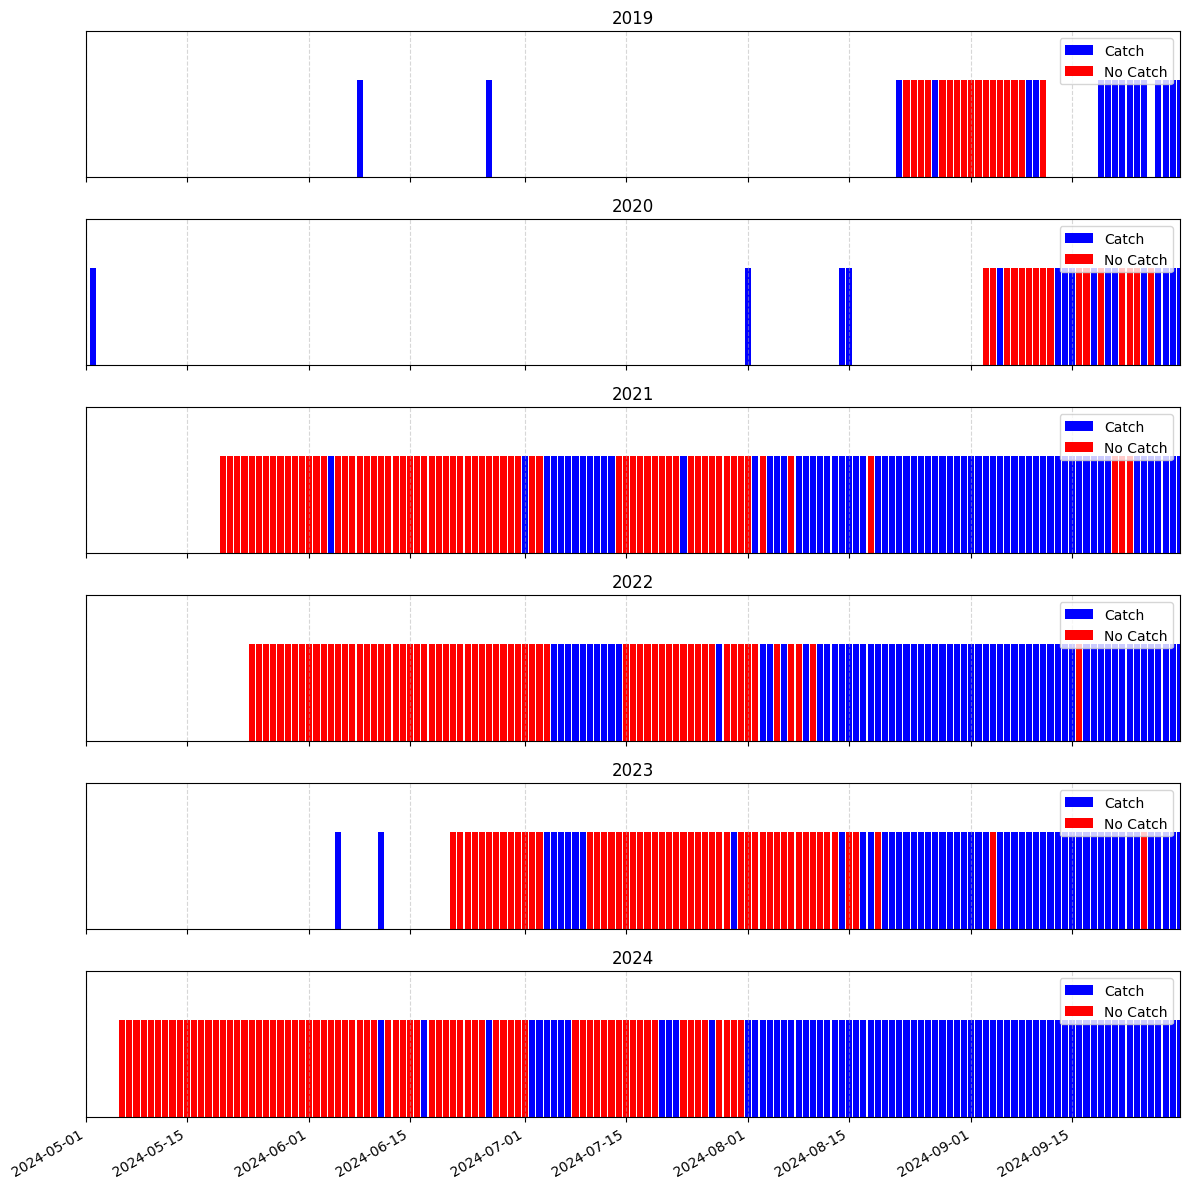

Plotting date distribution for FA_Makrell_MayAug_summer, catches: 1044 dates: 146/146: 292


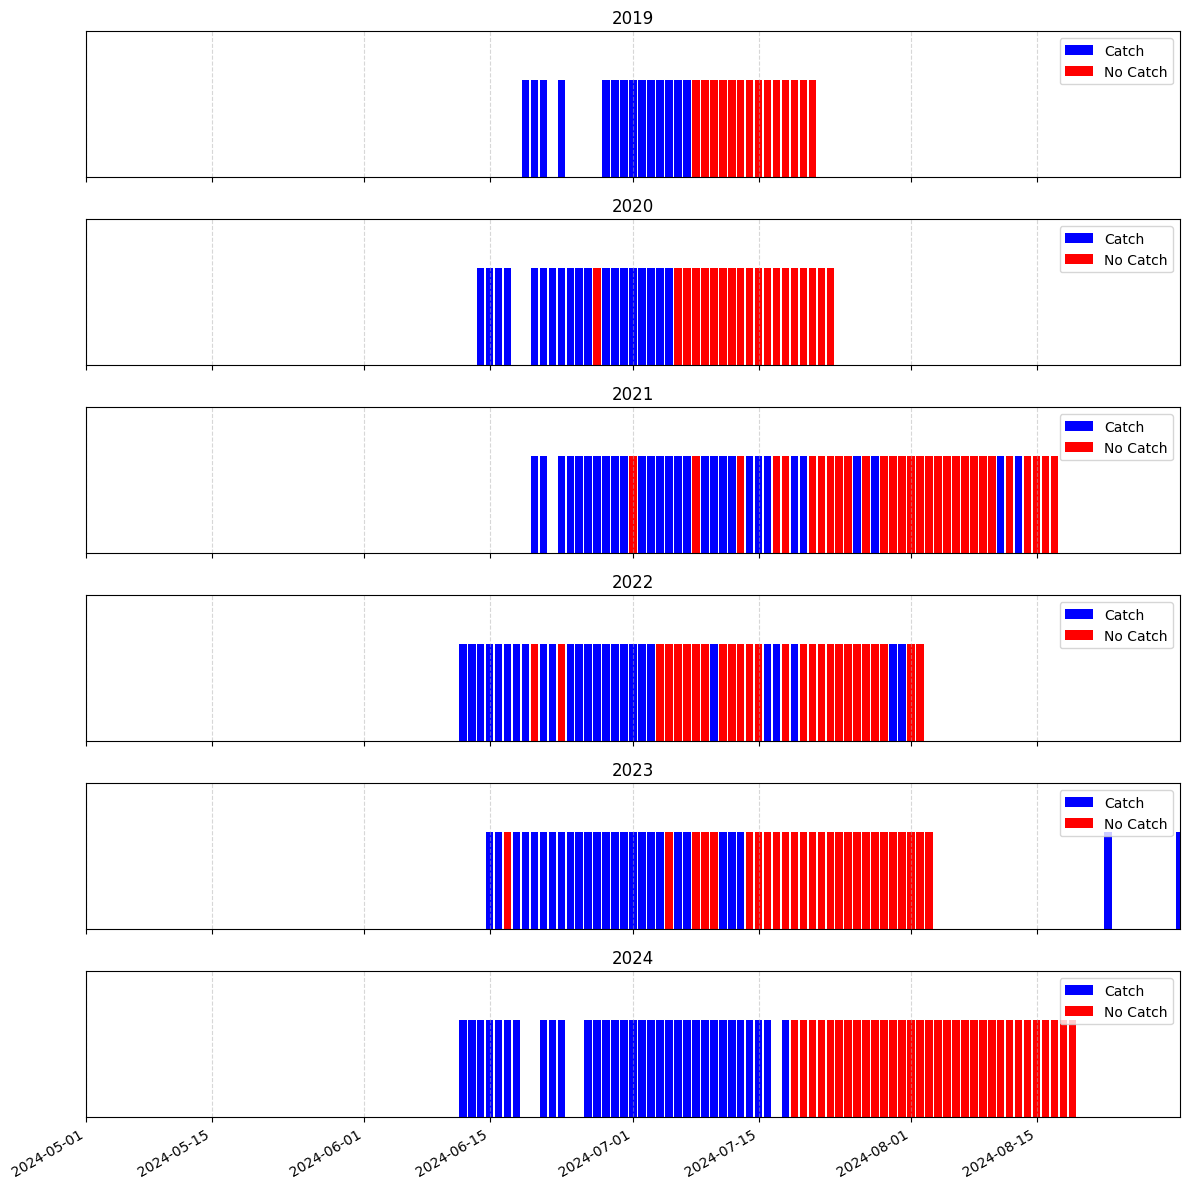

Plotting date distribution for FA_Makrell_JulNov_winter, catches: 8712 dates: 442/370: 812


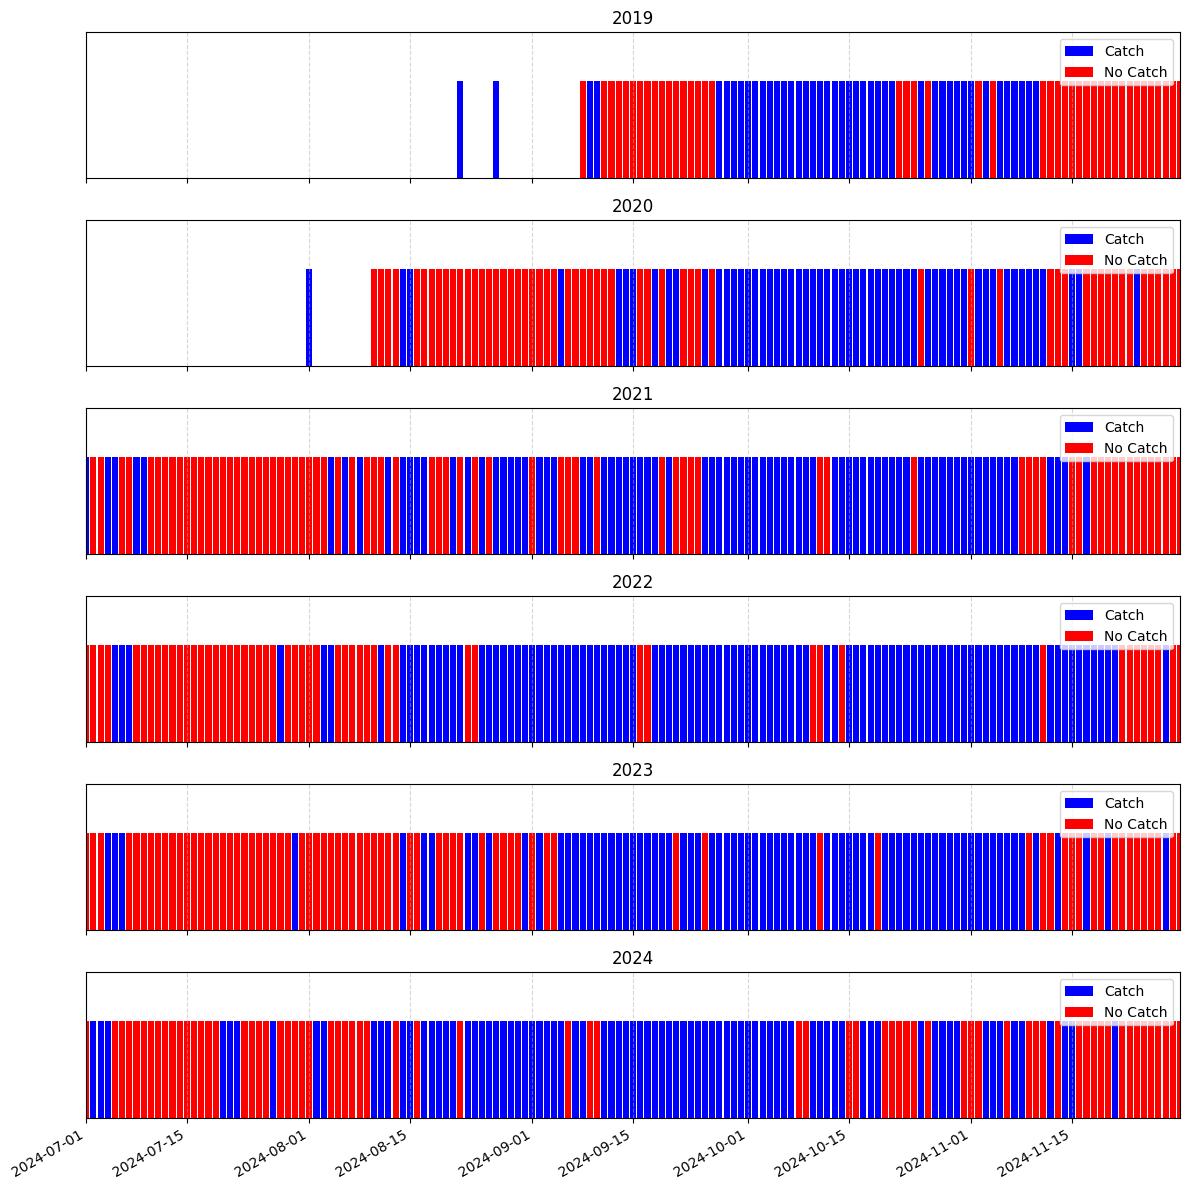

Plotting date distribution for FA_Arctic_Ocean_Sub_Area, catches: 16101 dates: 708/708: 1416


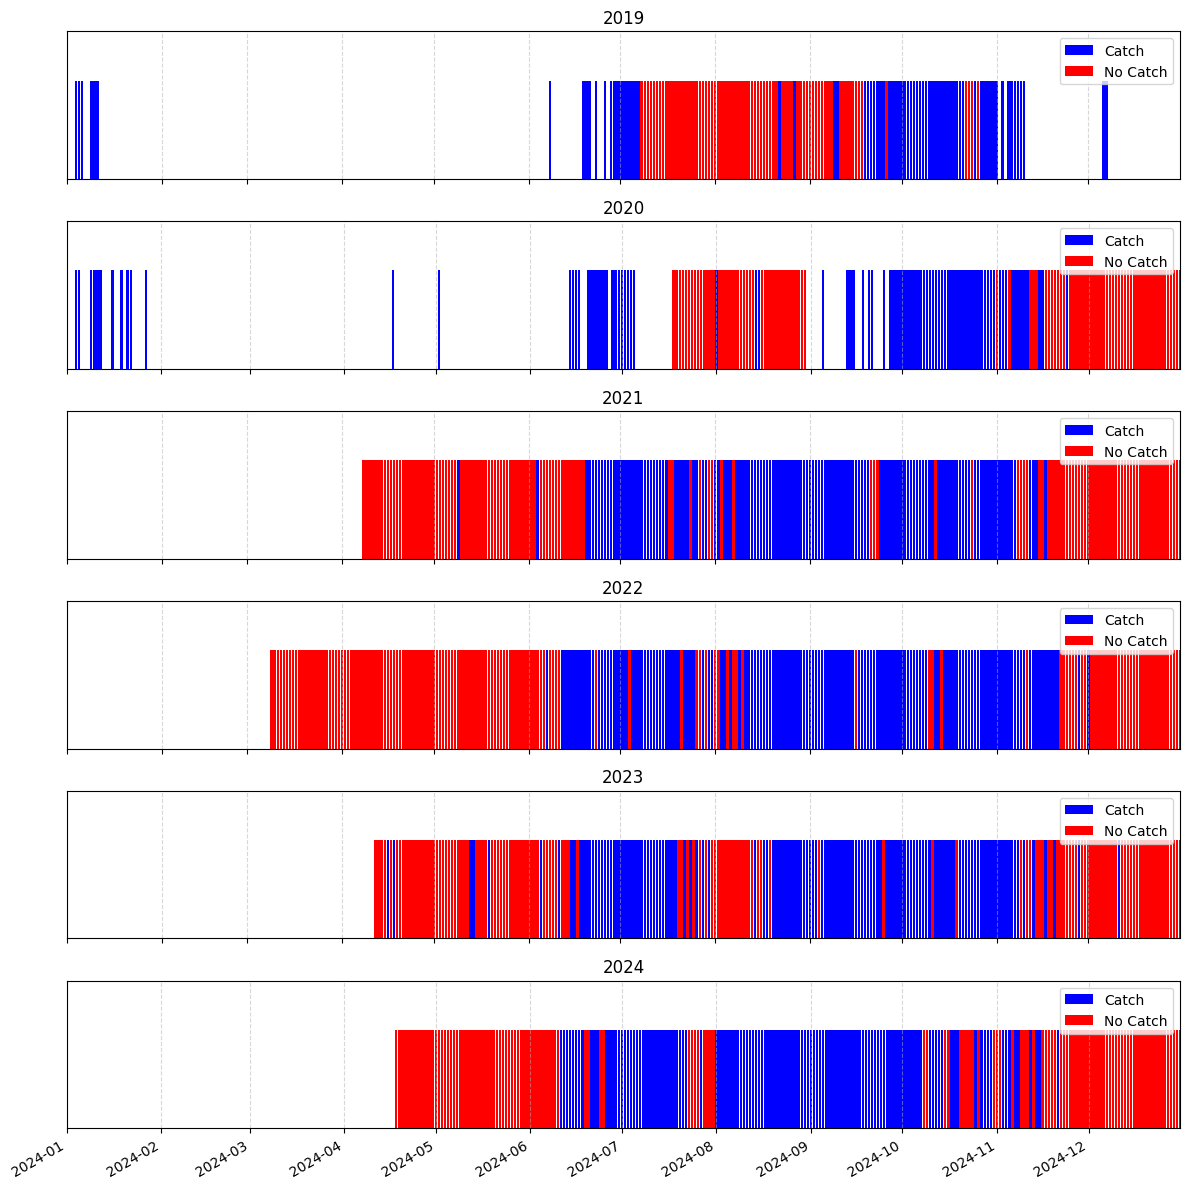

In [11]:
from utilities import plot_date_distribution
for region, region_df in dfs.items():
	catch_dates = set(region_df.loc[region_df['Rundvekt'].notna(), 'Date'])
	no_catch_dates = set(region_df['Date']) - catch_dates


	print(f"Plotting date distribution for {region}, catches: {len(region_df)} dates: {len(catch_dates)}/{len(no_catch_dates)}: {len(set(region_df['Date']))}")
	plot_date_distribution(catch_dates, no_catch_dates, start_date=MAC_TIMES[region][0], end_date=MAC_TIMES[region][1])